#### **Escuela Politecnica Nacional del Ecuador**
#### **Integrantes:** Luis Lema
#### **Fecha:** 09/12/2025

##### **Repositorio:** https://github.com/LuisALema/Metodos_Numericos_2025B/blob/main/Talleres/Taller5.ipynb

#### **[Taller 5] Mínimos Cuadrados**

##### **A)  Interpole los puntos:**
##### $p1 = (5.4, 3.2)$
##### $p2_i = (9.5, 0.7)$
##### $p3 = (12.3, -3.6)$
##### **De estos, el punto p2i debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Coordenadas base
A = (5.4, 3.2)
C = (12.3, -3.6)

# Cálculo de la parábola que pasa por tres puntos
def obtener_parabola(A, B, C):
    xs = np.array([A[0], B[0], C[0]])
    ys = np.array([A[1], B[1], C[1]])
    
    matriz = np.vstack([xs**2, xs, np.ones(len(xs))]).T
    coef = np.linalg.lstsq(matriz, ys, rcond=None)[0]
    
    return coef[0], coef[1], coef[2]

# Función de dibujo
def dibujar(punto_x=9.5, punto_y=0.7):
    B = (punto_x, punto_y)
    
    a, b, c = obtener_parabola(A, B, C)
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(*A, s=100, label='Punto A')
    plt.scatter(*B, s=100, label='Punto B')
    plt.scatter(*C, s=100, label='Punto C')
    
    rango_x = np.linspace(4, 14, 100)
    curva_y = a * rango_x**2 + b * rango_x + c
    
    plt.plot(rango_x, curva_y, label=f'y = {a:.2f}x² + {b:.2f}x + {c:.2f}')
    
    plt.xlim(4, 14)
    plt.ylim(-5, 5)
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Parábola Interpolada')
    plt.grid(True)
    plt.legend()
    plt.show()

# Control interactivo
interact(
    dibujar,
    punto_x=(5.5, 12.3, 0.1),
    punto_y=(-5.0, 5.0, 0.1)
)


interactive(children=(FloatSlider(value=9.5, description='punto_x', max=12.3, min=5.5), FloatSlider(value=0.7,…

<function __main__.dibujar(punto_x=9.5, punto_y=0.7)>

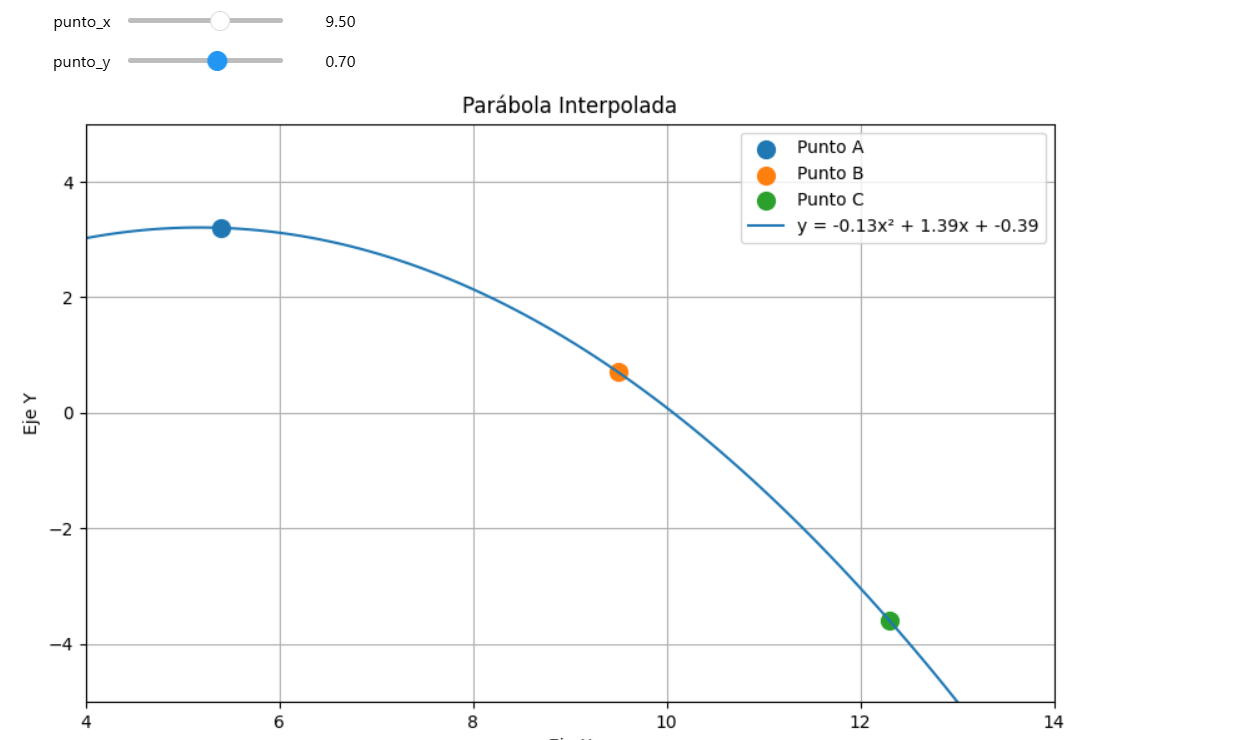

In [6]:
from IPython.display import Image, display
display(Image(filename="imagen.png"))


#### **B) Interpole el siguiente conjunto de datos:** 
```python
xs = [
    0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 
    0.9070, 1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 
    2.0114, 2.0557, 2.1610, 2.6344
]
ys = [
    1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 
    1.2887, 3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 
    10.5890, 11.5865, 11.8221, 26.5077
]

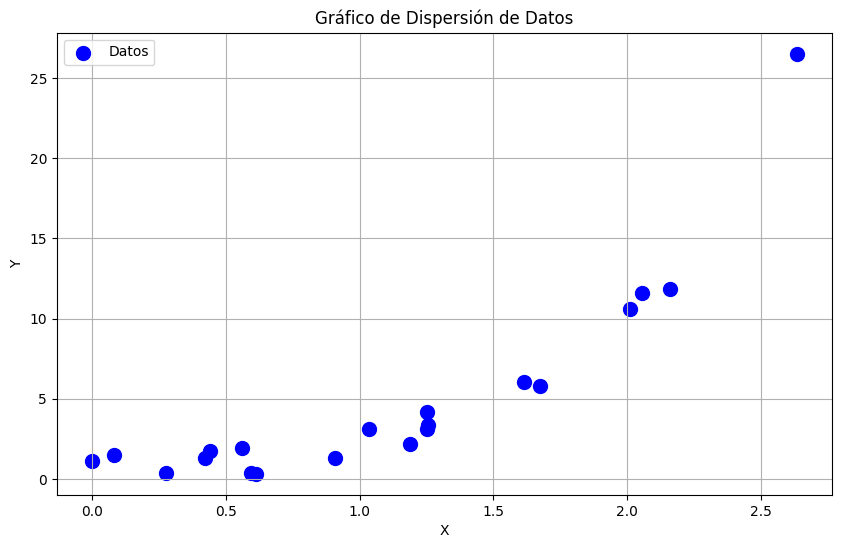

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Conjunto de datos para el gráfico
xs = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

# Crear el gráfico
plt.figure(figsize=(10, 6)) 
plt.scatter(xs, ys, color='blue', label='Datos', s=100)
plt.title('Gráfico de Dispersión de Datos')     
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

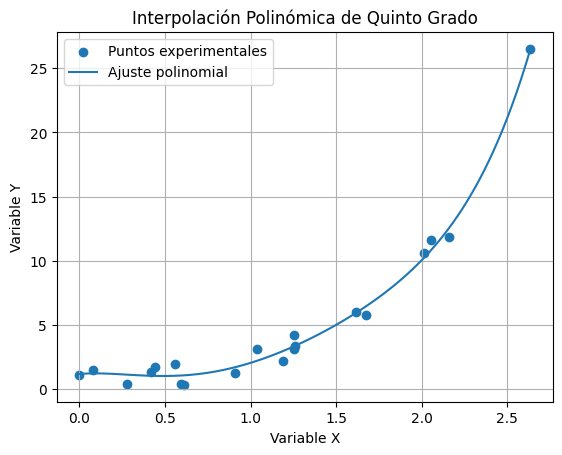

1.189 x^5 + -6.362 x^4 + 12.669 x^3 + -7.745 x^2 + 1.116 x + 1.186


In [5]:
from scipy.optimize import curve_fit
# Vector de interpolación (mismo rango)
x_vals = np.linspace(min(xs), max(xs), 100)

# Polinomio de quinto grado
def funcion_grado5(t, b5, b4, b3, b2, b1, b0):
    return b5*t**5 + b4*t**4 + b3*t**3 + b2*t**2 + b1*t + b0

# Ajuste del modelo a los datos
parametros, _ = curve_fit(funcion_grado5, xs, ys)
b5, b4, b3, b2, b1, b0 = parametros

# Función resultante del ajuste
def polinomio_ajustado(t):
    return b5*t**5 + b4*t**4 + b3*t**3 + b2*t**2 + b1*t + b0

# Cálculo de valores ajustados
y_vals = polinomio_ajustado(x_vals)

# Visualización de resultados
plt.scatter(xs, ys, label="Puntos experimentales")
plt.plot(x_vals, y_vals, label="Ajuste polinomial")
plt.title("Interpolación Polinómica de Quinto Grado")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.grid(True)
plt.legend()
plt.show()

# Mostrar polinomio final
print(
    f'{round(b5,3)} x^5 + {round(b4,3)} x^4 + {round(b3,3)} x^3 + '
    f'{round(b2,3)} x^2 + {round(b1,3)} x + {round(b0,3)}'
)
